<a href="https://colab.research.google.com/github/kendalllokay/Terence-Johnson-Fan-Club/blob/main/Project_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


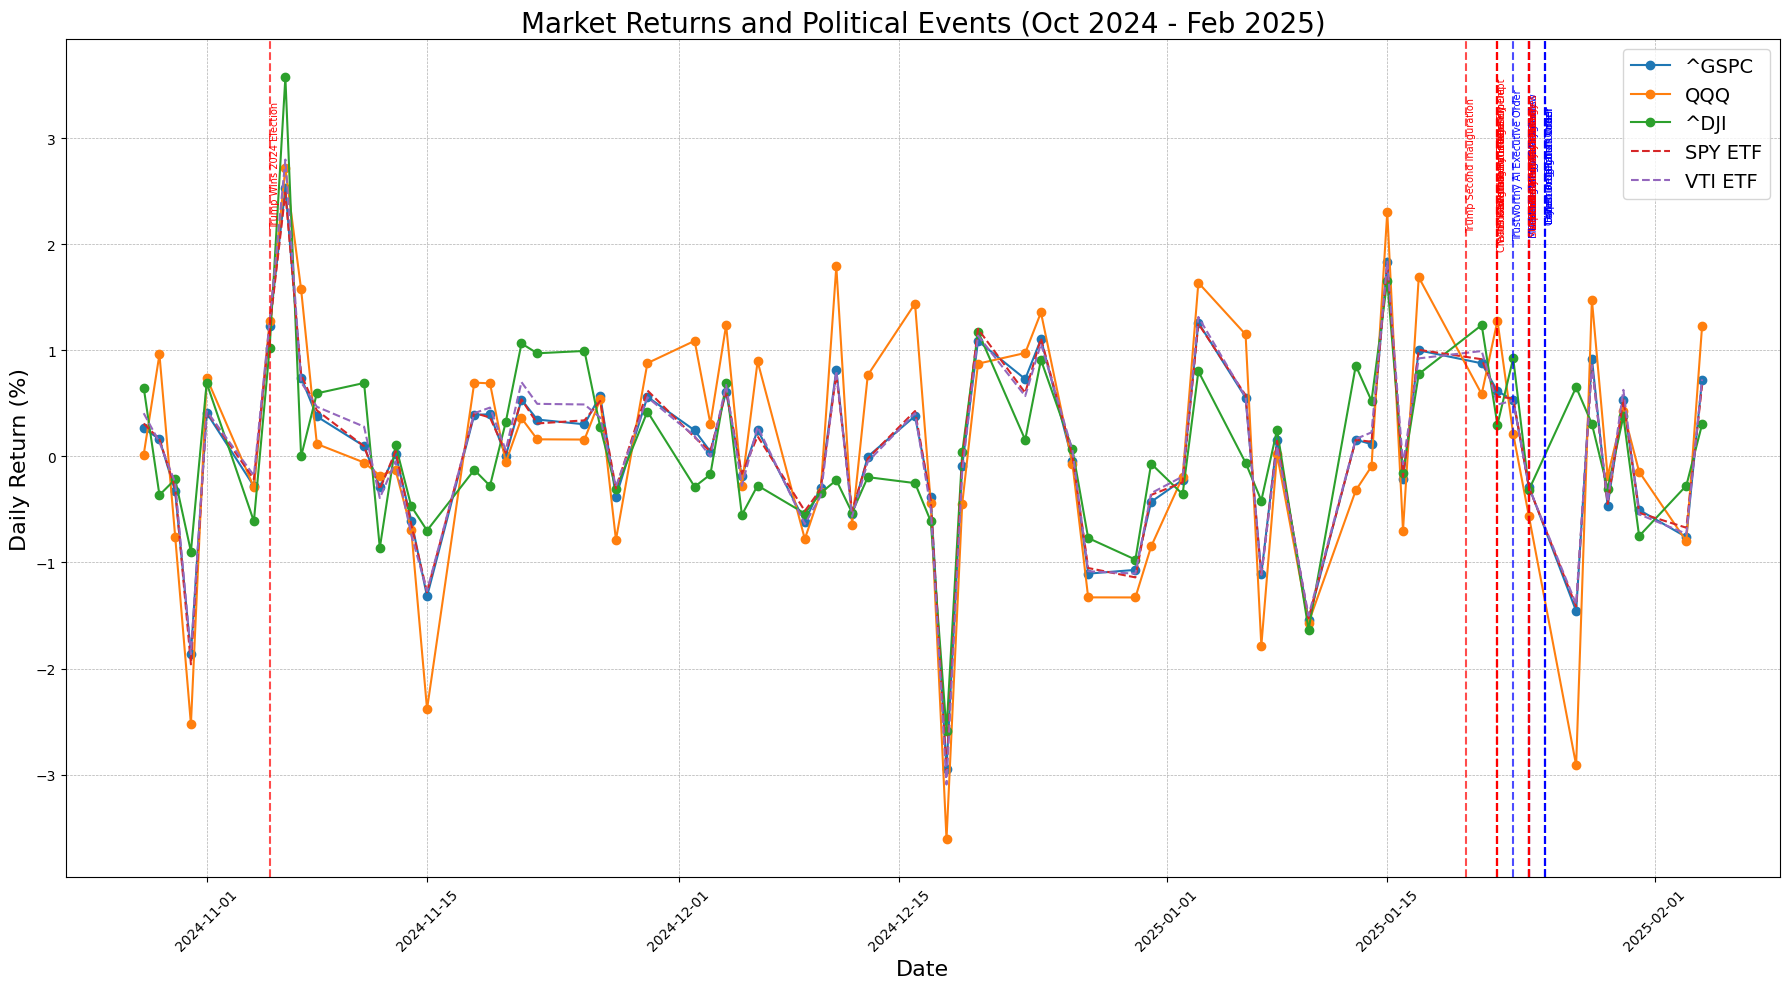

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# 1. Download stock data
tickers = ['^GSPC', 'QQQ', '^DJI', 'SPY', 'VTI']  # Indices + Major ETFs
start_date = '2024-10-25'
end_date = '2025-02-05'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

# 2. Calculate daily returns
returns = data.pct_change() * 100  # percent returns

# 3. Define all events
events_full = [
    ('2024-11-05', 'Trump Wins 2024 Election', 'Trump'),
    ('2025-01-20', 'Trump Second Inauguration', 'Trump'),
    ('2025-01-25', 'Crypto Regulation Order', 'Biden'),
    ('2025-01-25', 'Forest Protection Order', 'Biden'),
    ('2025-01-25', 'Abortion Rights Order', 'Biden'),
    ('2025-01-25', 'Lower Drug Costs Order', 'Biden'),
    ('2025-01-24', 'Strengthen ACA Order', 'Biden'),
    ('2025-01-24', 'Rebuild Refugee Programs', 'Biden'),
    ('2025-01-24', 'Modernize Regulatory Review', 'Biden'),
    ('2025-01-24', 'America First Trade Order', 'Trump'),
    ('2025-01-24', 'Delay TikTok Ban', 'Trump'),
    ('2025-01-24', 'Border Security Order', 'Trump'),
    ('2025-01-24', 'Unleash American Energy', 'Trump'),
    ('2025-01-24', 'Suspend Security Clearances', 'Trump'),
    ('2025-01-23', 'Trustworthy AI Executive Order', 'Biden'),
    ('2025-01-22', 'End Birthright Citizenship', 'Trump'),
    ('2025-01-22', 'Create Government Efficiency Dept', 'Trump'),
    ('2025-01-22', 'Regulatory Freeze', 'Trump'),
    ('2025-01-22', 'Reinstate Schedule F', 'Trump'),
    ('2025-01-22', 'Withdraw from Paris Agreement', 'Trump')
]

events_df = pd.DataFrame(events_full, columns=['Date', 'Event', 'President'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

# 4. Plotting
plt.figure(figsize=(18, 10))

# Plot major index returns only (GSPC, QQQ, DJI)
for ticker in ['^GSPC', 'QQQ', '^DJI']:
    plt.plot(returns.index, returns[ticker], marker='o', label=ticker)

# Add ETF markers (SPY, VTI)
for ticker in ['SPY', 'VTI']:
    plt.plot(returns.index, returns[ticker], linestyle='--', label=f'{ticker} ETF')

# Add vertical lines and event labels
for _, row in events_df.iterrows():
    color = 'blue' if row['President'] == 'Biden' else 'red'
    plt.axvline(row['Date'], color=color, linestyle='--', alpha=0.7)
    plt.text(row['Date'], plt.ylim()[1]*0.7, row['Event'],
             rotation=90, verticalalignment='center', fontsize=7, color=color)

# Aesthetics
plt.title('Market Returns and Political Events (Oct 2024 - Feb 2025)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Daily Return (%)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.tight_layout()

# Save plot
plt.savefig('market_returns_events.png', dpi=300)
plt.show()


In [13]:
# Redownload if needed
returns = data.pct_change().dropna() * 100
returns = returns.reset_index()

# Make sure you know what the S&P 500 column is called:
print(returns.columns)

# Set correct target column
target_column = '^GSPC'   # or 'Close_^GSPC' if needed

# Create event dummies
returns['Event_Occurred'] = returns['Date'].isin(events_df['Date']).astype(int)
returns['Trump_Event'] = returns['Date'].isin(events_df.query('President == "Trump"')['Date']).astype(int)
returns['Biden_Event'] = returns['Date'].isin(events_df.query('President == "Biden"')['Date']).astype(int)

# Confirm dummy creation
print(returns[['Date', 'Event_Occurred', 'Trump_Event', 'Biden_Event']].head())

# Build regression matrices
X = returns[['Event_Occurred', 'Trump_Event', 'Biden_Event']]
y = returns[target_column]

# Clean any NaNs
X = X.dropna()
y = y.loc[X.index]

# Confirm
print(X.shape, y.shape)

# Regression
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



Index(['Date', 'QQQ', 'SPY', 'VTI', '^DJI', '^GSPC'], dtype='object', name='Ticker')
Ticker       Date  Event_Occurred  Trump_Event  Biden_Event
0      2024-10-28               0            0            0
1      2024-10-29               0            0            0
2      2024-10-30               0            0            0
3      2024-10-31               0            0            0
4      2024-11-01               0            0            0
(67, 3) (67,)
                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8358
Date:                Mon, 28 Apr 2025   Prob (F-statistic):              0.479
Time:                        23:11:51   Log-Likelihood:                -83.170
No. Observations:                  67   AIC:                       

[*********************100%***********************]  1 of 1 completed


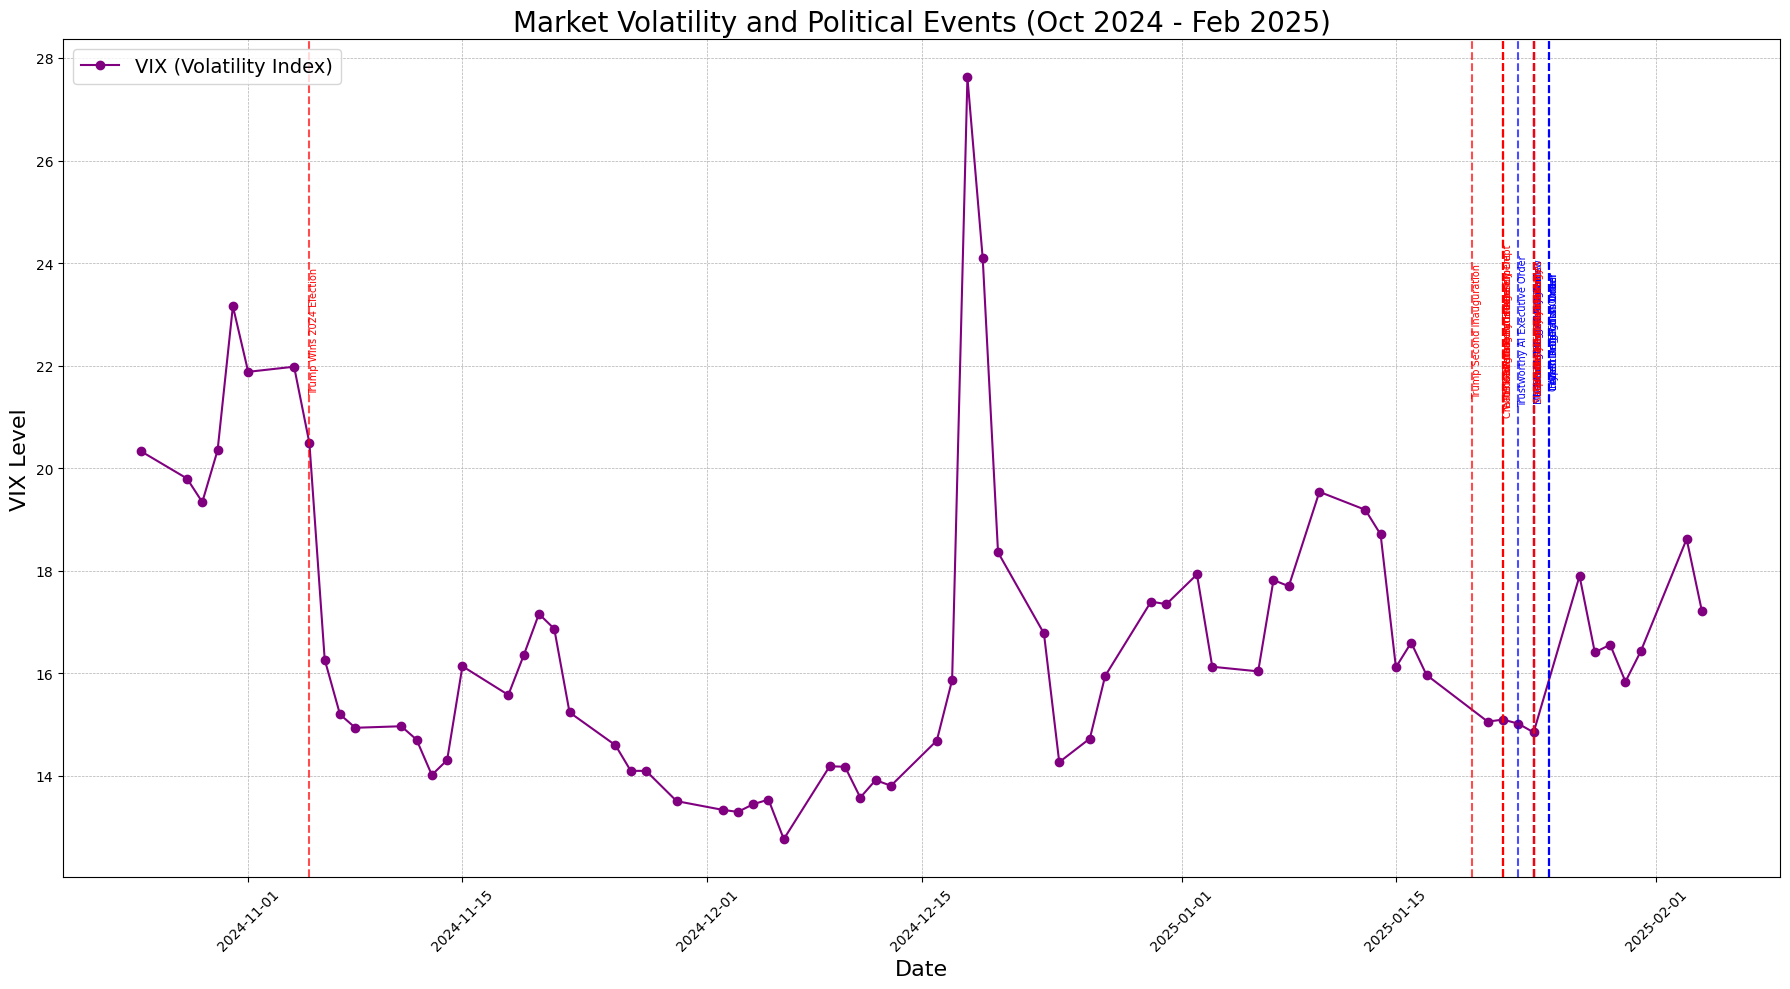

In [11]:
# 5. Download VIX volatility data
vix = yf.download('^VIX', start=start_date, end=end_date)['Close']

# 6. Plotting VIX
plt.figure(figsize=(18, 10))
plt.plot(vix.index, vix, label='VIX (Volatility Index)', color='purple', marker='o')

# Add vertical lines and event labels
for _, row in events_df.iterrows():
    color = 'blue' if row['President'] == 'Biden' else 'red'
    plt.axvline(row['Date'], color=color, linestyle='--', alpha=0.7)
    plt.text(row['Date'], plt.ylim()[1]*0.8, row['Event'],
             rotation=90, verticalalignment='center', fontsize=7, color=color)

# Aesthetics
plt.title('Market Volatility and Political Events (Oct 2024 - Feb 2025)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('VIX Level', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.tight_layout()

# Save plot
plt.savefig('vix_volatility_events.png', dpi=300)
plt.show()
